### Amazon Reviews

Use one of the following datasets to perform sentiment analysis on the given Amazon reviews. Pick one of the "small" datasets that is a reasonable size for your computer. The goal is to create a model to algorithmically predict if a review is positive or negative just based on its text. Try to see how these reviews compare across categories. Does a review classification model for one category work for another?


#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

In [2]:
from sklearn.preprocessing import quantile_transform

#### Data Cleaning
 - Remove Unwanted observations
 - Fix Structural Errors
 - Filter Unwanted Outliers
 - Handle Missing Data

In [3]:
# load json
data = [json.loads(line) for line in open('data.json', 'r')]
df = pd.concat([pd.Series(d) for d in data], axis=1, sort=False).T 

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"


In [ ]:
g = sns.jointplot("total_bill", "tip", data=tips, height=5, ratio=3, color="g")

In [21]:

# binary target
df['good'] = np.where(df.overall >= 4,1,0)
# use the length of the review as feature 
df['len_rvw'] = df.reviewText.apply(lambda x : len(x))
df['wrd_cnt'] = df.reviewText.apply(lambda x : len(x.split()))

pers = np.percentile(df.len_rvw, [25,50,75])
ords = ['ord_len', 'ord_cnt']
for o in ords:
    for per in pers:
        df[o] = np.zeros_like(df.asin)
        df[o] = df.[o].where(df.len_rvw < per, other=df.ord_len + 1)
gb = df.groupby(['ord_len', 'good']).asin.count() 


In [9]:
dfc.head()

,wrd_cnt
0,28
1,32
2,26
3,21
4,246


In [18]:
X = quantile_transform(dfc, n_quantiles=4, random_state=0, copy=True)

In [20]:
X

array([[0.31697342, 0.31034483],
       [0.36548223, 0.35185185],
       [0.26584867, 0.28735632],
       ...,
       [0.67631737, 0.67843952],
       [0.34348562, 0.38888889],
       [0.6672101 , 0.66805171]])

In [86]:
df.wrd_cnt.describe()

count    37126.000000
mean        91.291467
std        143.334783
min          1.000000
25%         26.000000
50%         43.000000
75%         87.000000
max       2954.000000
Name: wrd_cnt, dtype: float64

In [12]:
drops = [col for col in df.columns if col not in ['wrd_cnt', 'len_rvw']]

In [13]:
dfc = df.drop(drops, axis=1)

#### Feature Engineering
 - Infuse Domain Knowledge
 - Create Interaction Features
 - Combine Sparse Classes
 - Add Dummy Variables
 - Remove Unused Features
 
 analytical base table (ABT)

In [ ]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

#### Algorithm Selection Cross Value

#### Hyperparameter Selection

#### Model Training

#### Exploratory Analysis

Context of Data

Start with Basics

Plot Numerical Distributions

Plot Categorical Distributions

Plot Segmentations

Study Correlations


In [2]:
g = sns.jointplot("total_bill", "tip", data=tips, height=5, ratio=3, color="g")

In [10]:
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"


In [11]:
df.overall.describe()

count     37126.0
unique        5.0
top           5.0
freq      20890.0
Name: overall, dtype: float64

In [15]:
df.overall.mean()

4.209529709637451

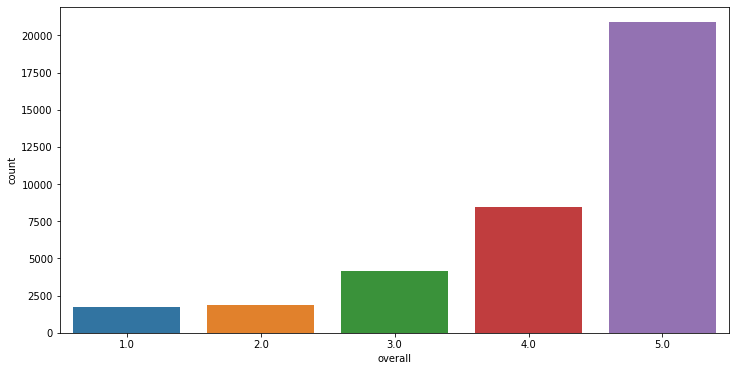

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,len_rvw
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014",159
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012",186
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013",134
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013",141
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009",1300


In [14]:
df.len_rvw.describe()

count    37126.000000
mean       515.292033
std        835.145610
min          4.000000
25%        145.000000
50%        232.000000
75%        484.000000
max      18152.000000
Name: len_rvw, dtype: float64

In [30]:
lens = df.len_rvw[df.len_rvw < 2000]

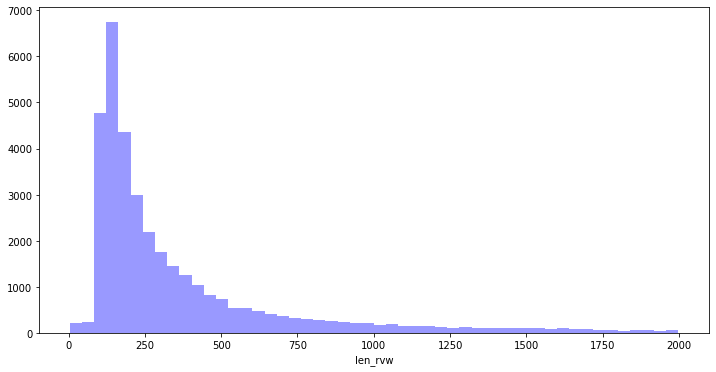

In [31]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(lens, color="b", kde = False,  ax=ax)
plt.show()

In [77]:
# percent good review by lenght of review ordinal rank ascending
[(gb[i][1] / (gb[i][0] + gb[i][1])) for i in range(len(gb) // 2)]

[0.8529957437520462, 0.838533874759564, 0.7862128207881456, 0.683491175204477]

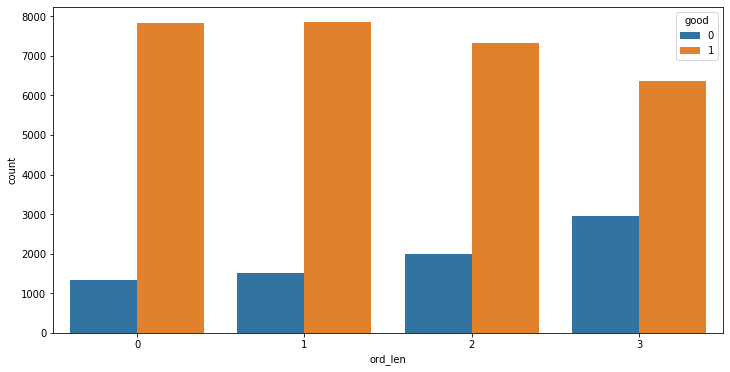

In [79]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="ord_len", data=df,  ax=ax, hue='good')
plt.show()